## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab_Notebooks/Netology/CV/002

/content/drive/MyDrive/Colab_Notebooks/Netology/CV/002


In [5]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Загружаем исходные данные

In [6]:
train = np.loadtxt('data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('data/digit/test.csv', delimiter=',', skiprows=1)

In [7]:
print(train.shape)

(42000, 785)


In [8]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

## Визуализируем исходные данные

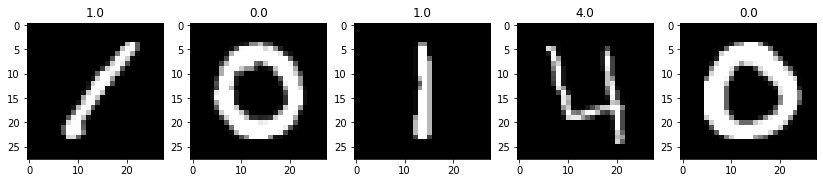

In [9]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Задаем параметры для вычисления дескриптора (HOG)

In [10]:
winSize = (28,28)
blockSize = (14,14)
blockStride = (14,14)
cellSize = (7,7)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,
                        blockSize,
                        blockStride,
                        cellSize,
                        nbins,
                        derivAperture,
                        winSigma,
                        histogramNormType,
                        L2HysThreshold,
                        gammaCorrection,
                        nlevels)

## Обрабатываем каждое избражение HOG-дескриптором

In [11]:
train_hist = np.zeros((len(train_img), 144))
test_hist = np.zeros((len(test_img), 144))

In [12]:
train_hist.shape

(42000, 144)

In [13]:
for i in range(len(train_img)):
    train_hist[i] = hog.compute(np.uint8(train_img[i])).flatten()

In [14]:
for i in range(len(test_img)):
    test_hist[i] = hog.compute(np.uint8(test_img[i])).flatten()

## Нормируем вектор гистограммы

In [15]:
# По умолчанию используется L2 норма
# + преобразование формы к (N, 1) вместо (N)
train_hist = train_hist / np.linalg.norm(train_hist, axis=1)[:, None]

In [16]:
test_hist = test_hist / np.linalg.norm(test_hist, axis=1)[:, None]

## Разбиваем выборку на обучение и валидацию

In [17]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_hist, test_size=0.2,
    random_state=42)

## Обучаем модель 

In [24]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

## Оцениваем модель

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
print('Accuracy: %s' % accuracy_score(y_val, clf.predict(x_val)))

Accuracy: 0.8763095238095238


## Предсказания на тестовых данных

In [32]:
pred_test = clf.predict(test_hist)

## Визуализируем предсказания

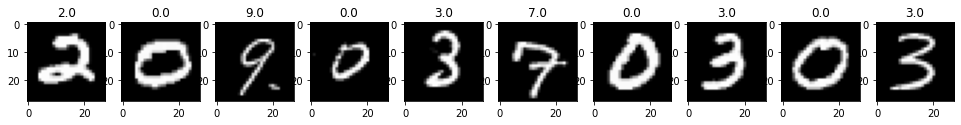

In [36]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:10], 1):
    subplot = fig.add_subplot(1, 12, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

## Готовим файл для отправки

In [38]:
with open('submit_2.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [39]:
!head submit_2.csv

ImageId,Label
1,2
2,0
3,9
4,0
5,3
6,7
7,0
8,3
9,0
